In [64]:
!pip install mlxtend==0.17.3

In [65]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [66]:
x, y = make_moons(n_samples=1000, noise=0.2, random_state=1)
n_train = 30
epochs = 200
dense_num = 200
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

In [67]:
print('X: mean %s std %s; Y mean %s std %s;'%(x.mean(),x.std(),y.mean(),y.std()))

X: mean 0.377387845912963 std 0.7428572776420321; Y mean 0.5 std 0.5;


Modelo base

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 101       
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Train: 0.833, Test: 0.836


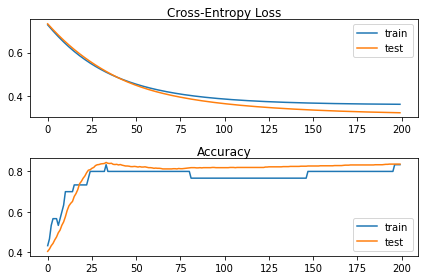

In [68]:
activation = 'tanh'
a = tf.keras.Sequential()
a.add(tf.keras.layers.Dense(100,activation=activation,input_dim=2))
a.add(tf.keras.layers.Dense(1,activation='sigmoid'))
a.summary()

a.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

a_hist = a.fit(train_x,train_y,epochs=epochs,verbose=0,validation_data=(test_x, test_y))

_, train_acc = a.evaluate(train_x, train_y, verbose=0)
_, test_acc = a.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(a_hist.history['loss'], label='train')
plt.plot(a_hist.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(a_hist.history['accuracy'], label='train')
plt.plot(a_hist.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Modelo com dropout

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 200)               600       
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 201       
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
Train: 0.833, Test: 0.842


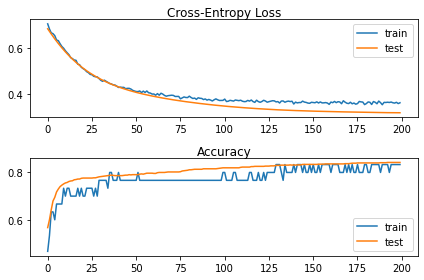

In [69]:
activation = 'tanh'
b = tf.keras.Sequential()
b.add(tf.keras.layers.Dense(dense_num,activation=activation,input_dim=2))
b.add(tf.keras.layers.Dropout(0.1))
b.add(tf.keras.layers.Dense(1,activation='sigmoid'))
b.summary()

b.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

b_hist = b.fit(train_x,train_y,epochs=epochs,verbose=0,validation_data=(test_x, test_y))

_, train_acc = b.evaluate(train_x, train_y, verbose=0)
_, test_acc = b.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(b_hist.history['loss'], label='train')
plt.plot(b_hist.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(b_hist.history['accuracy'], label='train')
plt.plot(b_hist.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Modelo com relu

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 200)               600       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 201       
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
Train: 0.900, Test: 0.860


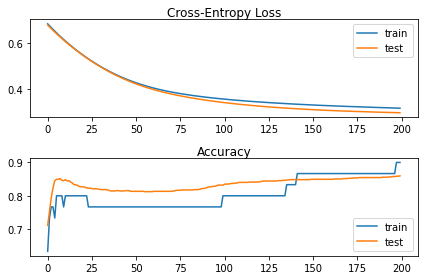

In [70]:
activation = 'relu'
c = tf.keras.Sequential()
c.add(tf.keras.layers.Dense(dense_num,activation=activation,input_dim=2))
c.add(tf.keras.layers.Dense(1,activation='sigmoid'))
c.summary()

c.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

c_hist = c.fit(train_x,train_y,epochs=epochs,verbose=0,validation_data=(test_x, test_y))

_, train_acc = c.evaluate(train_x, train_y, verbose=0)
_, test_acc = c.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(c_hist.history['loss'], label='train')
plt.plot(c_hist.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(c_hist.history['accuracy'], label='train')
plt.plot(c_hist.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Modelo com early stop

In [71]:
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, verbose=1,
    mode='auto', restore_best_weights=True
)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 200)               600       
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 201       
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
Train: 0.833, Test: 0.842


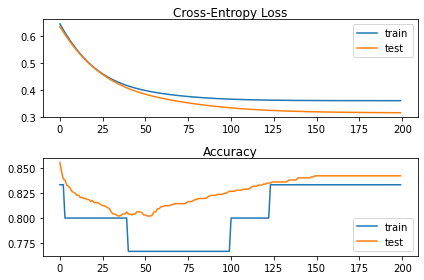

In [72]:
activation = 'tanh'
d = tf.keras.Sequential()
d.add(tf.keras.layers.Dense(dense_num,activation=activation,input_dim=2))
d.add(tf.keras.layers.Dense(1,activation='sigmoid'))
d.summary()

d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

d_hist = d.fit(train_x,train_y,epochs=epochs,verbose=0,validation_data=(test_x, test_y),callbacks=[early])

_, train_acc = d.evaluate(train_x, train_y, verbose=0)
_, test_acc = d.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(d_hist.history['loss'], label='train')
plt.plot(d_hist.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(d_hist.history['accuracy'], label='train')
plt.plot(d_hist.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Modelo com tudo junto

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 200)               600       
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 201       
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
Train: 0.867, Test: 0.860


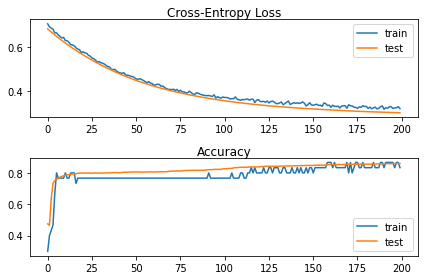

In [74]:
activation = 'relu'
e = tf.keras.Sequential()
e.add(tf.keras.layers.Dense(dense_num,activation=activation,input_dim=2))
e.add(tf.keras.layers.Dropout(0.1))
e.add(tf.keras.layers.Dense(1,activation='sigmoid'))
e.summary()

e.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

e_hist = e.fit(train_x,train_y,epochs=epochs,verbose=0,validation_data=(test_x, test_y),callbacks=[early])

_, train_acc = e.evaluate(train_x, train_y, verbose=0)
_, test_acc = e.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(e_hist.history['loss'], label='train')
plt.plot(e_hist.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(e_hist.history['accuracy'], label='train')
plt.plot(e_hist.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()